In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
#load the data set
excel_file_path='C:\\Users\\HANZZ\\Desktop\\Msc\\online_retail_II.xlsx'

# Read the first sheet into a DataFrame
df1 = pd.read_excel(excel_file_path, sheet_name='Year 2009-2010')

# Read the second sheet into another DataFrame
df2 = pd.read_excel(excel_file_path, sheet_name='Year 2010-2011')

# Combine both DataFrames into one
data = pd.concat([df1, df2])


In [3]:
#check the first few(5) rows
data.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
# Check the data types and structure of the dataset(attributtes)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


In [5]:
#statistical information about the numerical attributes
#Conduct a data exploration to comprehend the structure, size, and attributes of the dataset
print(data.describe())

           Quantity         Price    Customer ID
count  1.067371e+06  1.067371e+06  824364.000000
mean   9.938898e+00  4.649388e+00   15324.638504
std    1.727058e+02  1.235531e+02    1697.464450
min   -8.099500e+04 -5.359436e+04   12346.000000
25%    1.000000e+00  1.250000e+00   13975.000000
50%    3.000000e+00  2.100000e+00   15255.000000
75%    1.000000e+01  4.150000e+00   16797.000000
max    8.099500e+04  3.897000e+04   18287.000000


In [6]:
#check the null values in the data
data.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [7]:
# Handle the missing values
data = data.dropna()

In [8]:
#check the duplicates
data.duplicated().sum()

26479

In [9]:
# Remove the duplicates
data = data.drop_duplicates()

In [10]:
# Data corrections
df = data[(data['StockCode'].astype(str).str.len() == 5) & 
          (data['StockCode'].astype(str).str[::].str.isnumeric()) & 
          (data['Invoice'].astype(str).str.startswith('C') == False) & 
          (data['Price'] != 0) & 
          (data['Quantity'] > 0)]

In [11]:
#Remove outliers in the dataframe
df=df[(df['Quantity']<=30000)&(df['Price']<250)]

In [12]:
# Calculate basic statistics
# Calculate descriptive statistics for 'Quantity'
quantity_stats = [
    df['Quantity'].count(),
    df['Quantity'].max(),
    df['Quantity'].min(),
    df['Quantity'].mean(),
    df['Quantity'].std()
]

# Calculate descriptive statistics for 'Price'
price_stats = [
    df['Price'].count(),
    df['Price'].max(),
    df['Price'].min(),
    df['Price'].mean(),
    df['Price'].std()
]

# Calculate descriptive statistics for 'InvoiceDate'
invoice_date_stats = [
    df['InvoiceDate'].count(),
    df['InvoiceDate'].max(),
    df['InvoiceDate'].min(),
    df['InvoiceDate'].mean(),
    df['InvoiceDate'].std()
]

# Create a DataFrame
stats_df = {
    'Statistic': ['Count', 'Max', 'Min', 'Mean','Std'],
    'Quantity': quantity_stats,
    'Price': price_stats,
    'InvoiceDate': invoice_date_stats
}

# Display the DataFrame
print(pd.DataFrame(stats_df))


  Statistic       Quantity          Price                    InvoiceDate
0     Count  690545.000000  690545.000000                         690545
1       Max   19152.000000     195.000000            2011-12-09 12:50:00
2       Min       1.000000       0.030000            2009-12-01 07:45:00
3      Mean      13.368206       2.918197  2011-01-11 17:40:43.558638592
4       Std      77.663968       3.664399    219 days 04:54:50.114793780


In [13]:
# Treat 'InvoiceDate' as datetime in .describe()
print(df['InvoiceDate'].describe())  

count                  690545
unique                  33787
top       2011-11-14 15:27:00
freq                      485
first     2009-12-01 07:45:00
last      2011-12-09 12:50:00
Name: InvoiceDate, dtype: object


C:\Users\HANZZ\AppData\Local\Temp\ipykernel_5352\1450044284.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df['InvoiceDate'].describe())


In [14]:
# Descriptive statistics for Quantity, UnitPrice and InvoiceDate
# Treat 'InvoiceDate' as numeric in .describe()
print(df[['Quantity', 'Price', 'InvoiceDate']].describe(datetime_is_numeric=True))

            Quantity          Price                    InvoiceDate
count  690545.000000  690545.000000                         690545
mean       13.368206       2.918197  2011-01-11 17:40:43.558638592
min         1.000000       0.030000            2009-12-01 07:45:00
25%         2.000000       1.250000            2010-07-18 12:49:00
50%         6.000000       1.950000            2010-12-10 11:19:00
75%        12.000000       3.750000            2011-08-10 14:55:00
max     19152.000000     195.000000            2011-12-09 12:50:00
std        77.663968       3.664399                            NaN


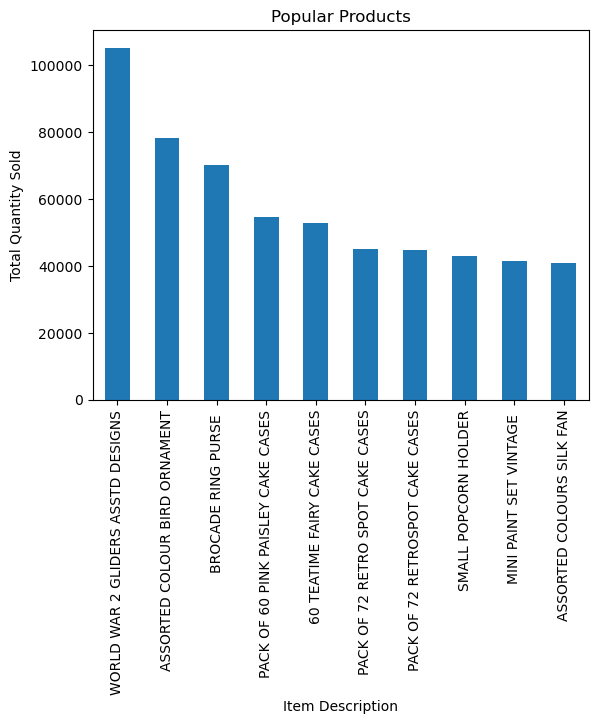

In [15]:
# Identify 10 most popular products
df.groupby('Description')['Quantity'].sum().nlargest(10).plot(kind='bar')
plt.title('Popular Products')
plt.xlabel('Item Description')
plt.ylabel('Total Quantity Sold')
plt.show()



Best-Selling Categories:
Category
CASES        407017
DESIGN       374924
HOLDER       327204
BOX          251329
SIGN         235494
TISSUES      229922
MUG          183047
BAG          165581
RETROSPOT    157999
CHRISTMAS    140750
Name: Quantity, dtype: int64


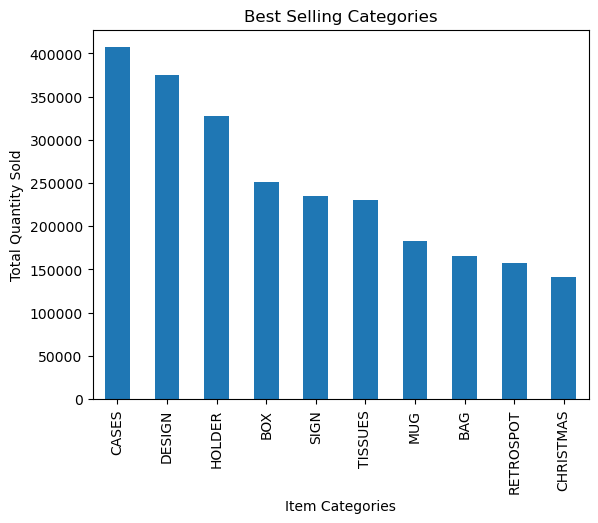

In [16]:
# Determine best-selling 10 categories (with sales quantity)
df['Category'] = df['Description'].apply(lambda x: x.split()[-1]) # Categorized by last word of decsription
best_selling_categories = df.groupby('Category')['Quantity'].sum().nlargest(10)
print("\nBest-Selling Categories:")
print(best_selling_categories)
best_selling_categories.plot(kind='bar',title='Best Selling Categories')
plt.title('Best Selling Categories')
plt.xlabel('Item Categories')
plt.ylabel('Total Quantity Sold')
plt.show()


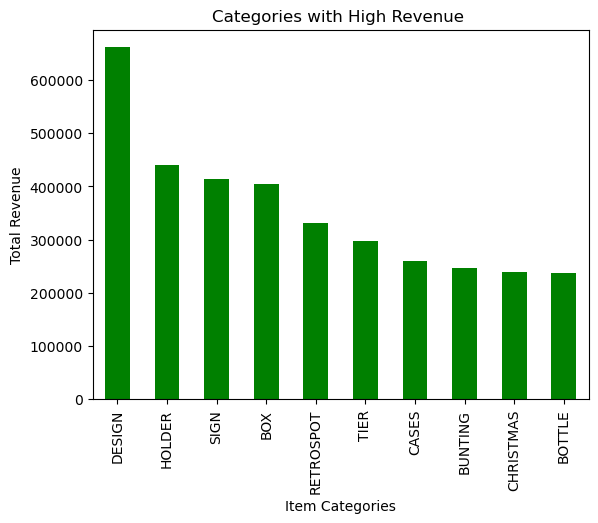

In [17]:
# Determine 10 categories with highest revenue 
df['Total Revenue'] = df['Quantity'] * df['Price']
df.groupby('Category')['Total Revenue'].sum().nlargest(10).plot(kind='bar', color='green', rot=90)
plt.title('Categories with High Revenue ')
plt.xlabel('Item Categories')
plt.ylabel('Total Revenue')
plt.show()

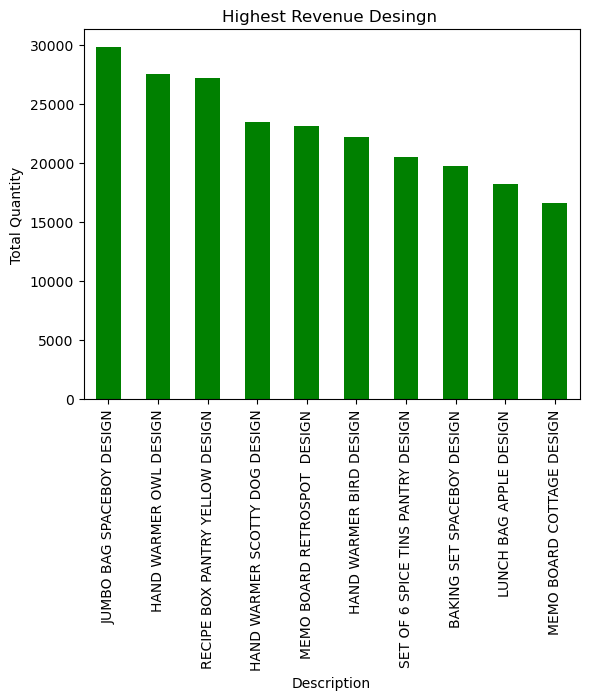

In [18]:
# Filter the DataFrame to include rows where 'Description' ends with 'DESIGN'
design_types = df[df['Description'].str[-6:] == 'DESIGN']

# Group by 'Description' and sum the 'Revenue' for each category, then plot the top 10 categories by revenue
design_types.groupby('Description')['Total Revenue'].sum().nlargest(10).plot(kind='bar',color='green')
plt.xlabel('Description')
plt.ylabel('Total Quantity')
plt.title('Highest Revenue Desingn ')
plt.show()

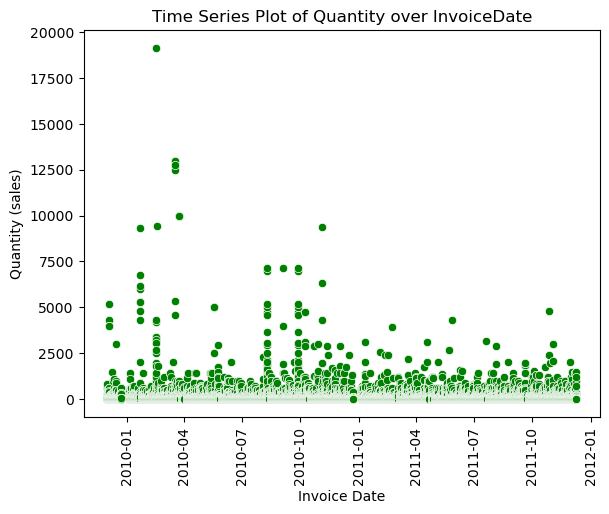

In [19]:
# Create a scatter plot to visualize sales over the time period
sns.scatterplot(data=df, x='InvoiceDate', y='Quantity', color='green')
plt.xlabel('Invoice Date')
plt.ylabel('Quantity (sales)')
plt.title('Time Series Plot of Quantity over InvoiceDate')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

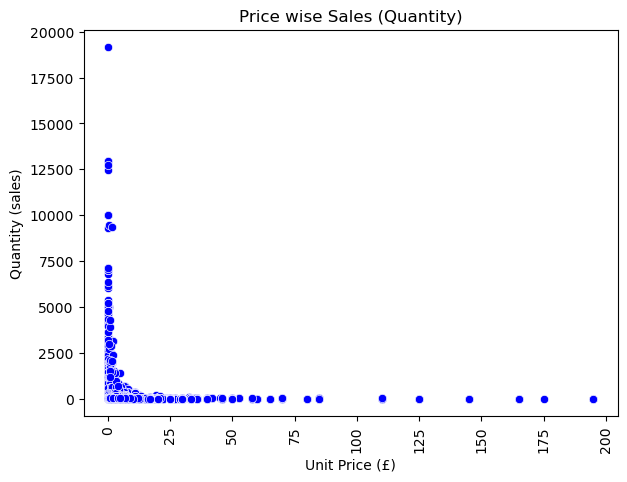

In [20]:
# Create a scatter plot to visualize sales with price
sns.scatterplot(data=df, x='Price', y='Quantity', color='blue')
plt.xlabel('Unit Price (£)')
plt.ylabel('Quantity (sales)')
plt.title('Price wise Sales (Quantity)')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

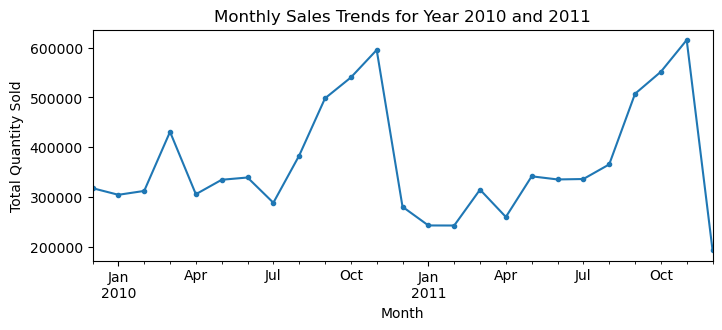

In [21]:
# Create a line plot to visualize sales trend over time period
monthly_sales = df.set_index('InvoiceDate')['Quantity'].resample('M').sum()
plt.figure(figsize=(8, 3))
monthly_sales.plot(kind='line', marker='.')
plt.title('Monthly Sales Trends for Year 2010 and 2011')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.show()

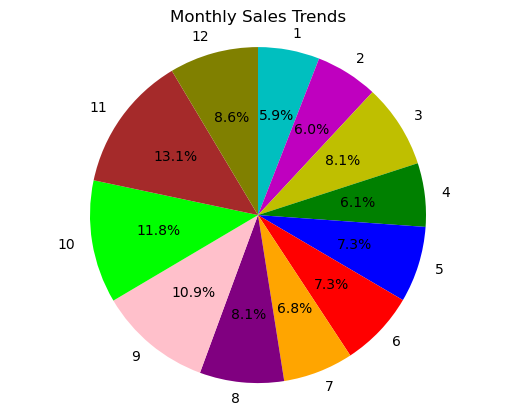

In [22]:
# Showing percentage of sales according to month in a pie chart
monthly_sales = df.groupby(df['InvoiceDate'].dt.month)['Quantity'].sum()
colors = ['c', 'm', 'y', 'g', 'b', 'r', 'orange', 'purple', 'pink', 'lime', 'brown', 'olive']
plt.pie(monthly_sales, labels=monthly_sales.index, colors=colors, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Monthly Sales Trends')
plt.axis('equal')  # Equal aspect ratio (pie is drawn as a circle)
plt.show()

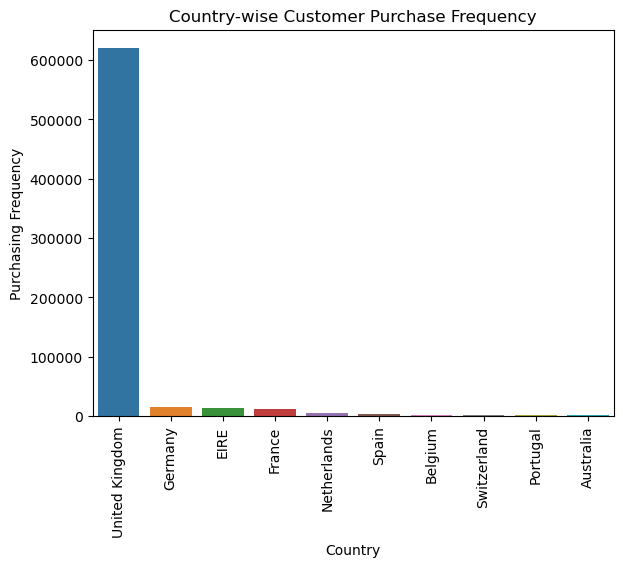

In [23]:
# Analyze the customer demographics in Country wise
sns.countplot(data=df, x='Country', order=df['Country'].value_counts().head(10).index)
plt.xlabel('Country')
plt.ylabel('Purchasing Frequency')
plt.title('Country-wise Customer Purchase Frequency')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

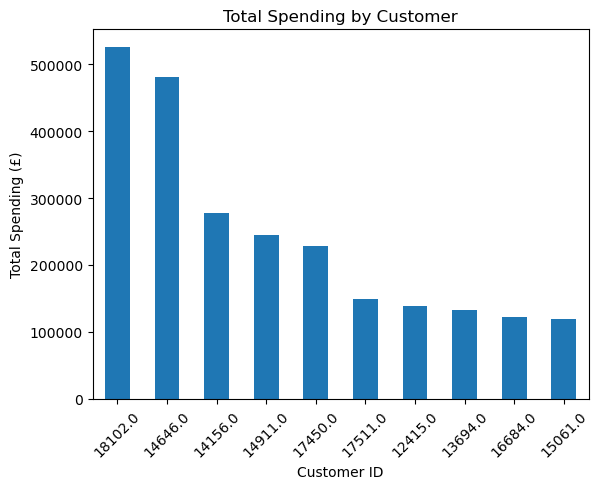

In [24]:
# determine the top 10 high spenders
df['Total Spending'] = df['Quantity'] * df['Price']
df.groupby('Customer ID')['Total Spending'].sum().nlargest(10).plot(kind='bar', rot=45)
plt.title('Total Spending by Customer')
plt.xlabel('Customer ID')
plt.ylabel('Total Spending (£)')
plt.show()

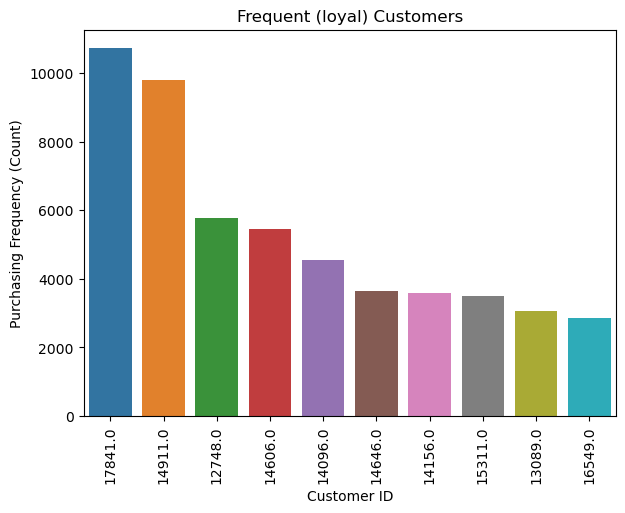

In [25]:
# Customer-wise purchasing frequency (loyal customers)
loyal_customers = sns.countplot(data=df, x='Customer ID', order=df['Customer ID'].value_counts().head(10).index)
plt.xlabel('Customer ID')
plt.ylabel('Purchasing Frequency (Count)')
plt.title('Frequent (loyal) Customers')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

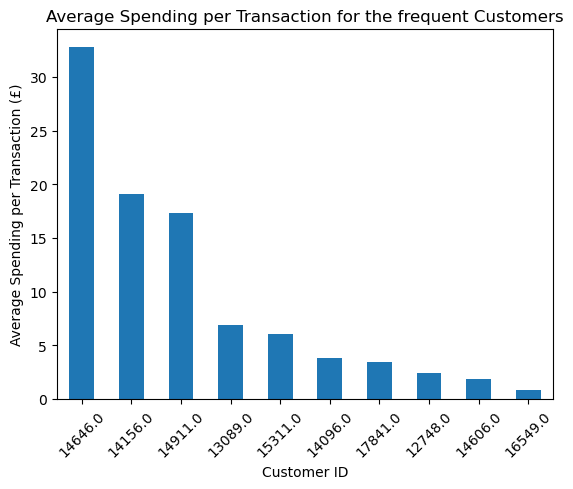

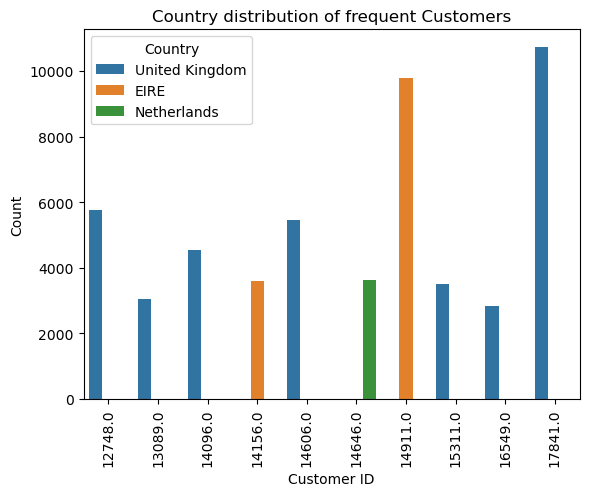

In [26]:
# Get the frequent customer transaction counts based on the highest number of occurrences
transaction_counts = df['Customer ID'].value_counts().nlargest(10).index

# Use boolean indexing to filter data for the frequent customer IDs
filtered_data = df[df['Customer ID'].isin(transaction_counts)]


# Calculate the total spending per customer in filtered_data
total_spending_per_customer = filtered_data.groupby('Customer ID')['Total Spending'].sum()

# Calculate the average spending per transaction for each customer
average_spending_per_transaction= total_spending_per_customer / transaction_counts

# Create a bar plot for average spending per transaction by frequent customers
average_spending_per_transaction.nlargest(10).plot(kind='bar', rot=45)
plt.xlabel('Customer ID')
plt.ylabel('Average Spending per Transaction (£)')
plt.title('Average Spending per Transaction for the frequent Customers')
plt.show()

# Create a count plot for countries by frequent customers
sns.countplot(data=filtered_data, x='Customer ID', hue='Country')
plt.xlabel('Customer ID')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Country distribution of frequent Customers')
plt.show()

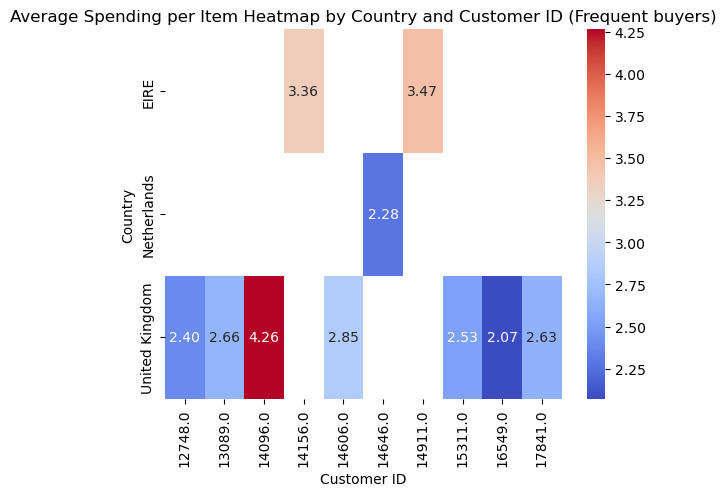

In [27]:
df['Average Spending'] = df['Total Spending'] / df['Quantity']
# Create a pivot table for average spending with Country and Customer ID for most frequent customers
filtered_data = df[df['Customer ID'].isin(transaction_counts)]
pivot_table = filtered_data.pivot_table(index='Country', columns='Customer ID', values='Average Spending')

# Create a heatmap to display the average spending
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Average Spending per Item Heatmap by Country and Customer ID (Frequent buyers)')
plt.show()

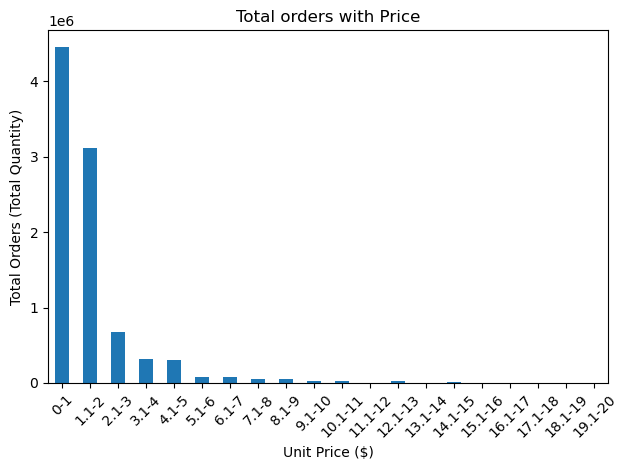

In [28]:
# Categorize the prices into ranges
price_bins = [0, 1.1, 2.1, 3.1, 4.1, 5.1, 6.1, 7.1, 8.1, 9.1, 10.1, 11.1, 12.1, 13.1, 14.1, 15.1, 16.1, 17.1, 18.1, 19.1, 20.1]
price_labels = ['0-1', '1.1-2', '2.1-3', '3.1-4', '4.1-5', '5.1-6', '6.1-7', '7.1-8', '8.1-9', '9.1-10', '10.1-11', '11.1-12',
                '12.1-13', '13.1-14', '14.1-15', '15.1-16', '16.1-17', '17.1-18', '18.1-19', '19.1-20']
df['PriceRange'] = pd.cut(df['Price'], bins=price_bins, labels=price_labels)

# creat bar chart to disply order amount with price ranges
df.groupby('PriceRange')['Quantity'].sum().plot(kind='bar', rot=45)
plt.xlabel('Unit Price ($)')
plt.ylabel('Total Orders (Total Quantity)')
plt.title('Total orders with Price')
plt.tight_layout()
plt.show()

In [29]:
# Analyze correlations between variables (Quantity and Price)
correlation_matrix = df[['Quantity', 'Price']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
          Quantity     Price
Quantity  1.000000 -0.062126
Price    -0.062126  1.000000


In [30]:
# Analyze correlations between variables (Total Spending and Price)
correlation_matrix = df[['Total Spending', 'Price']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                Total Spending    Price
Total Spending         1.00000  0.08703
Price                  0.08703  1.00000


In [31]:
# Analyze correlations between variables (Quantity and InvoiceDate)
df['InvoiceDate'] = pd.to_numeric(df['InvoiceDate'])
correlation_matrix = df[['Quantity', 'InvoiceDate']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
             Quantity  InvoiceDate
Quantity     1.000000    -0.011527
InvoiceDate -0.011527     1.000000


In [32]:
# Analyze correlations between variables (Price and InvoiceDate)
df['InvoiceDate'] = pd.to_numeric(df['InvoiceDate'])
correlation_matrix = df[['Price', 'InvoiceDate']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                Price  InvoiceDate
Price        1.000000    -0.022679
InvoiceDate -0.022679     1.000000


In [33]:
## Q2:COMScDSP231-013 ##